In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc

In [4]:
data = pd.read_csv('insurance_claims.csv')

#info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_number                1000 non-null   int64  
 1   months_as_customer           1000 non-null   int64  
 2   age                          1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# data stats
data.describe()

,policy_number,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,546238.648000,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,257063.005276,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,100804.000000,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,335980.250000,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,533135.000000,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,759099.750000,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,999435.000000,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
# checking the nan values
data.isnull().sum()

policy_number                  0
months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
data['fraud_reported'] 

fraud_output = []
response = data.iloc[:,-1]
 
# converting output to binary   
for i in  range(len(response)):
     fraud_output.append(1 if response[i] == 'Y' else 0 )
    
data['fraud_reported'] = pd.Series(fraud_output)
print(data)

     policy_number  months_as_customer  age policy_bind_date policy_state  \
0           521585                 328   48       10/17/2014           OH   
1           342868                 228   42        6/27/2006           IN   
2           687698                 134   29       09-06-2000           OH   
3           227811                 256   41        5/25/1990           IL   
4           367455                 228   44       06-06-2014           IL   
..             ...                 ...  ...              ...          ...   
995         941851                   3   38        7/16/1991           OH   
996         186934                 285   41       01-05-2014           IL   
997         918516                 130   34        2/17/2003           OH   
998         533940                 458   62       11/18/2011           IL   
999         556080                 456   60       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

Text(0.5, 1.0, 'Histogram of age of customers')

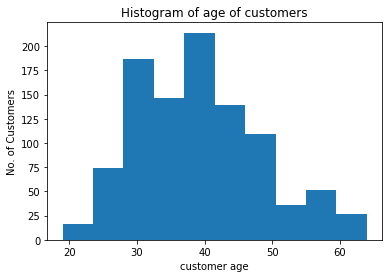

In [9]:
# data analysis
plt.hist(data['age'])
plt.ylabel('No. of Customers')
plt.xlabel('customer age')
plt.title("Histogram of age of customers")

Text(0, 0.5, 'No. of customers')

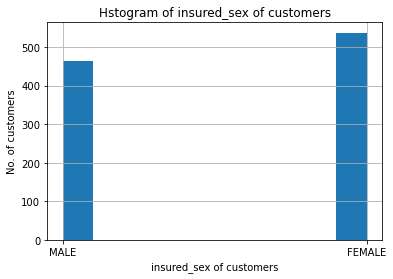

In [10]:
data["insured_sex"].hist()
plt.title("Hstogram of insured_sex of customers")
plt.xlabel("insured_sex of customers")
plt.ylabel("No. of customers")

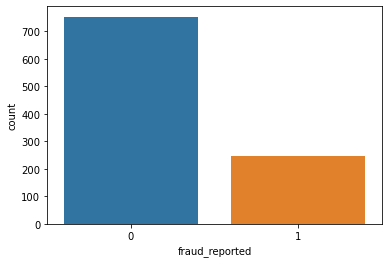

In [11]:
# checking the output if its balanced!!
sns.countplot(data.iloc[:,-1]) #imbalanced

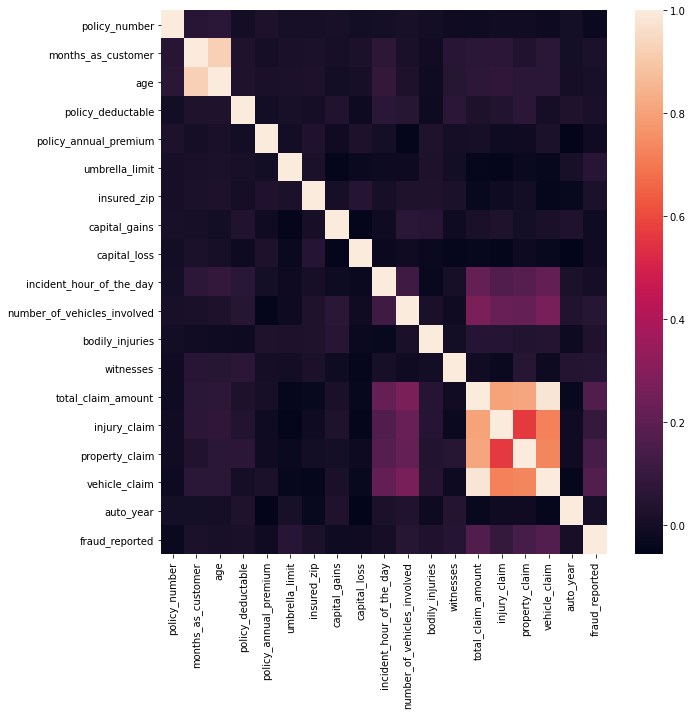

In [12]:
#feature selection#
rcParams['figure.figsize'] = [10,10]
sns.heatmap(data.corr())

In [13]:
data.info()
#policy number in x is irrelevant for prediction
x = data.iloc[:,1:38]
x_columns = x.columns
y = data.iloc[:,-1] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_number                1000 non-null   int64  
 1   months_as_customer           1000 non-null   int64  
 2   age                          1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [14]:

#feature selection
#ordinal encoder
#encode categorical features as an integer array.
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder() 
oe.fit(x)
x_enc = oe.transform(x)
x_enc = pd.DataFrame(x_enc , columns= x_columns )  
columns = pd.DataFrame(x_enc.columns)

#Label encoder
#Encode target labels with value between 0 and n_classes-1
#This transformer should be used to encode target values, i.e. y, and not the input X.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
le.fit(y)
y_enc = pd.DataFrame((le.transform(y)), columns =['fraud_reported'])


#extracting the features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2, k = 'all')
fit = best_features.fit(x_enc,y_enc)

#scores of the features
scores = pd.DataFrame(fit.scores_)

feature_scores = pd.concat([columns,scores], axis = 1)
feature_scores.columns = ['features','scores']
feature_scores.nlargest(37,'scores')

,features,scores
33,vehicle_claim,2644.587085
30,total_claim_amount,2549.783115
32,property_claim,2085.626042
31,injury_claim,933.096711
8,insured_zip,633.756096
19,incident_severity,122.804296
2,policy_bind_date,85.918188
14,capital_gains,62.553620
16,incident_date,38.748357
6,policy_annual_premium,38.355350


In [15]:
#dropping the columns with least scores
columns_to_drop = ['collision_type',    
                   'insured_hobbies',     
                   'umbrella_limit',     
                   'incident_state',     
                   'number_of_vehicles_involved',     
                   'capital_loss',     
                   'incident_type',     
                   'incident_city',
                   'authorities_contacted',    
                   'witnesses',     
                   'auto_make',
                   'policy_csl',     
                   'bodily_injuries',     
                   'property_damage',     
                   'age',     
                   'policy_state',     
                   'police_report_available',     
                   'insured_relationship',     
                   'insured_sex',     
                   'auto_year',     
                   'insured_education_level',     
                   'incident_hour_of_the_day',     
                   'policy_deductable',     
                   'insured_occupation',     
                   'auto_model']

imp_data = data.drop(columns_to_drop, axis =1) 

imp_data.info()

X = imp_data.iloc[:,1:13]
Y = imp_data.iloc[:,-1] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   policy_number          1000 non-null   int64  
 1   months_as_customer     1000 non-null   int64  
 2   policy_bind_date       1000 non-null   object 
 3   policy_annual_premium  1000 non-null   float64
 4   insured_zip            1000 non-null   int64  
 5   capital_gains          1000 non-null   int64  
 6   incident_date          1000 non-null   object 
 7   incident_severity      1000 non-null   object 
 8   incident_location      1000 non-null   object 
 9   total_claim_amount     1000 non-null   int64  
 10  injury_claim           1000 non-null   int64  
 11  property_claim         1000 non-null   int64  
 12  vehicle_claim          1000 non-null   int64  
 13  fraud_reported         1000 non-null   int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 109.5+ K

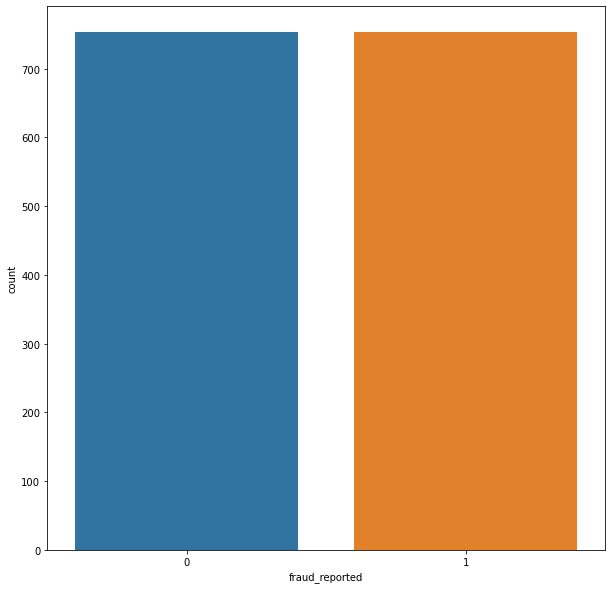

In [16]:

#dummy coding
X = pd.get_dummies(X, drop_first=True)

#we are using an minority class over sampling technique 
#and converting it into a balanced dataset

#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 24)
#X , Y = sm.fit_resample(X, Y)

from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
X, Y = ROS.fit_sample(X,Y)


#plotting the independent variable
sns.countplot(Y)

#scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)




0.8344370860927153
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       155
           1       0.82      0.85      0.83       147

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.84      0.83      0.83       302

[0.78145695 0.78807947 0.82119205 0.78807947 0.8013245  0.81456954
 0.79333333 0.83333333 0.83333333 0.81333333]


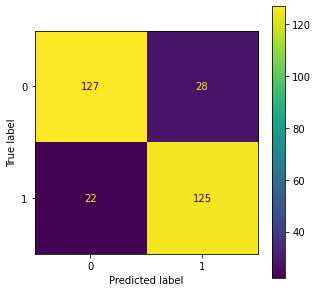

In [17]:
#splitting the training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(0.2))

rcParams['figure.figsize'] = [5,5]

#xgboost

from xgboost import  XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
XGB_Predictions = XGB.predict(x_test)
print(accuracy_score(y_test, XGB_Predictions))
print(classification_report(y_test, XGB_Predictions))
plot_confusion_matrix(XGB , x_test , y_test)

In [18]:
#cross validation accuracy scores for xgb
from sklearn.model_selection import cross_val_score
print(cross_val_score(XGB,X,Y,cv=10,scoring='accuracy'))

[0.78145695 0.78807947 0.82119205 0.78807947 0.8013245  0.81456954
 0.79333333 0.83333333 0.83333333 0.81333333]


0.9370860927152318
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       155
           1       0.89      1.00      0.94       147

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



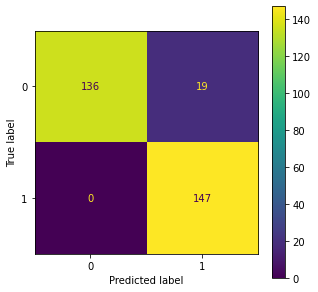

In [19]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
RF_Predictions = RF.predict(x_test)
print(accuracy_score(y_test, RF_Predictions))
print(classification_report(y_test, RF_Predictions))
plot_confusion_matrix(RF , x_test , y_test)


In [20]:
#cross validation accuracy scores rf
print(cross_val_score(RF,X,Y,cv=10,scoring='accuracy'))

[0.90066225 0.91390728 0.8807947  0.94039735 0.95364238 0.93377483
 0.92666667 0.97333333 0.96666667 0.95333333]


0.9900662251655629
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       155
           1       1.00      0.98      0.99       147

    accuracy                           0.99       302
   macro avg       0.99      0.99      0.99       302
weighted avg       0.99      0.99      0.99       302



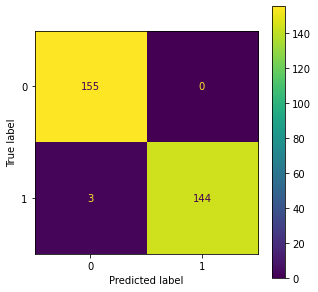

In [21]:
#support vector machine classifier # best model
from sklearn import svm
SVC = svm.SVC()
SVC.fit(x_train,y_train)
SVC_Predictions = SVC.predict(x_test)
print(accuracy_score(y_test,SVC_Predictions)) 
print(classification_report(y_test, SVC_Predictions))
plot_confusion_matrix(SVC , x_test , y_test)


In [22]:
#cross validation accuracy scores svm
print(cross_val_score(SVC,X,Y,cv=10,scoring='accuracy'))

[0.94039735 0.92715232 0.9205298  0.96688742 0.99337748 1.
 1.         1.         1.         1.        ]


AUC value = 0.9897959183673469


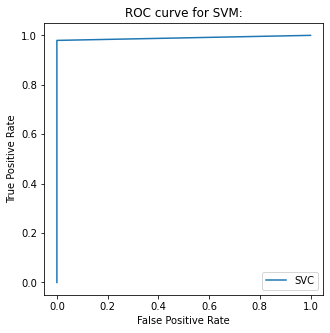

In [23]:
#Receiving Operator Charecteristic for SVM
plt.title("ROC curve for SVM:")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

model_pred = {}

tpr , fpr , threshold = roc_curve(y_test, SVC_Predictions, pos_label = 1)
model_pred["SVC"] = [tpr, fpr]
print("AUC value = " +str(auc(tpr,fpr)))


for key, value in model_pred.items():
    model_list = model_pred[key]
    plt.plot(model_list[0], model_list[1], label=key)
    plt.legend()
plt.show()

0.8443708609271523
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       137
           1       0.87      0.84      0.86       165

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.85      0.84      0.84       302



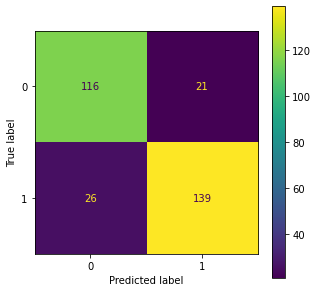

In [25]:

#LDA gives you best result out of all incase you filter out minimal irrelevant features.
#since its a dimensionality reduction algorithm.
#lets try

data 
x_lda = data.iloc[:,1:38]
y_lda = data.iloc[:,-1]


columns_to_drop_lda = ["auto_model", 
                      "policy_bind_date",
                      "policy_state", 
                      "incident_date",
                      "incident_state",
                      "incident_city",
                      "incident_location", 
                      "policy_csl"]

x_lda = x_lda.drop(columns_to_drop_lda, axis=1)

x_lda = pd.get_dummies(x_lda, drop_first=True)
x_lda, y_lda = ROS.fit_sample(x_lda,y_lda)
x_lda = ss.fit_transform(x_lda)

#splitting the training and testing data
x_lda_train, x_lda_test, y_lda_train, y_lda_test = train_test_split(x_lda, y_lda, test_size=(0.2))


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_lda_train,y_lda_train)
LDA_Predictions = LDA.predict(x_lda_test)
print(accuracy_score(y_lda_test, LDA_Predictions))
print(classification_report(y_lda_test, LDA_Predictions))
plot_confusion_matrix(LDA , x_lda_test , y_lda_test)